# Inspector

Inspecting the generated ASTs.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import json
import os
import joblib
from operator import itemgetter



In [4]:
DATA_PATH = 'data/keras-example/graph/'

## Load data

### Features

In [206]:
feats = np.load(DATA_PATH+'feats.npy')
feats.shape

(214569, 105)

### Graph

In [207]:
G_data = json.load(open(DATA_PATH + "G.json"))
G = json_graph.node_link_graph(G_data)
print(G.number_of_nodes(), G.number_of_edges())

214569 321933


### Node id map

In [211]:
node_id_map = json.load(open(DATA_PATH + "id_map.json"))

### File map

In [210]:
file_map = json.load(open(DATA_PATH + "file_map.json"))

### Source-code line map

In [212]:
source_map = json.load(open(DATA_PATH + "source_map.json"))

### AST Token maps

In [213]:
ast_symbol_dict = joblib.load(filename='ast_symbol_dict')
inv_ast_symbol_dict = joblib.load(filename='inv_ast_symbol_dict')

---

## Helpers

In [270]:
def get_name_from_token(token, show_id=True):
    tokenid  = np.nonzero(token)[0][0]
    return get_name_from_token_id(tokenid, show_id=show_id)

In [271]:
def get_name_from_token_id(tokenid, show_id = True):
    strtoken = inv_ast_symbol_dict.get(tokenid)
    
    if strtoken is None:
        strtoken = "<Unknown token>"
    else:
        strtoken = strtoken.__name__
        
    if show_id is True:
        strtoken += " " + str(tokenid) 
        
    return strtoken

In [272]:
def inspect_node_recursive(node_id, G, feats, depth=0):
    '''
    Recursively print neighbouring node tokens
    '''
    neighbours = list(G.adj[node_id])
    for i,token in enumerate(feats[neighbours]):
        strtoken = get_name_from_token(token)
        print(" "*depth, strtoken)
        if depth < 2:
            inspect_node_recursive(i, G, feats, depth+1)

In [273]:
# Example usage
inspect_node_recursive(1, G=G, feats=feats)

 Module 0
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Assign 9
   Expr 24
   <Unknown token> 104
  ImportFrom 21
   Module 0
   alias 101
  Assign 9
   ImportFrom 21
  Expr 24
   Module 0
   alias 101
  <Unknown token> 104
   ImportFrom 21
 alias 101
  Module 0
   ImportFrom 21
   ImportFrom 21
   Assign 9
   Expr 24
   <Unknown token> 104
  alias 101
   Module 0
   alias 101


In [281]:
def draw_egonet(node_id=1009, radius=2):
    node_and_degree = G.degree()
    hub_ego = nx.ego_graph(G, node_id, radius=radius)
    # Draw graph
    pos = nx.spring_layout(hub_ego)

    neighbours = list(hub_ego.nodes())
    labels = {}
    for tokenid in neighbours:
        labels[tokenid] = get_name_from_token_id(tokenid, show_id=False)
    labels

    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[node_id], node_size=300, node_color='r')
    plt.show()

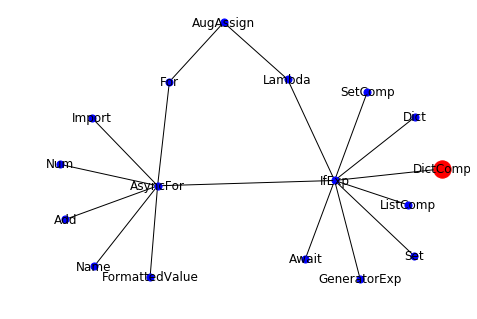

In [284]:
# Example usage 
draw_egonet(37, radius=3)